In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys, pathlib

# Project-1 folder (parent of this Notebooks/ folder)
proj_dir = pathlib.Path.cwd().parent
if str(proj_dir) not in sys.path:
    sys.path.insert(0, str(proj_dir))

# Figures folder
fig_dir = proj_dir / "Figures"
fig_dir.mkdir(parents=True, exist_ok=True)

from Code.data import make_data, build_features, split_and_scale

# --- Project-wide experiment config (new variables added on as they are introduced) ---

# Data settings
N_SAMPLES   = 300     # number of samples
NOISE_SD    = 0.3     # noise standard deviation
SEED_DATA   = 42      # data generation
SEED_SPLIT  = 42      # train/test split (split_and_scale uses this)
DEG_MAX     = 15      # max polynomial degree for features
P_FIXED     = 15      # fixed polynomial degree for regularization experiments
TEST_SIZE   = 0.20    # train/test split size


# Regularization grids
LAM_GRID_RIDGE = np.logspace(-6, 1, 40)  # wider range for ridge

# Optimizer settings
LAM_RIDGE  = 1e-4  # Taken from ridge experiments (02_Ridge_lambda.ipynb) best lambda for degree 15
LAMBDAS    = np.r_[0.0, np.logspace(-6, 5, 40)]

# --- Generate data explicitly---
x, y = make_data(n=N_SAMPLES, noise_sd=NOISE_SD, seed=SEED_DATA)
X_full = build_features(x, degree=DEG_MAX, include_bias=False)


X_tr_s, X_te_s, y_tr_c, y_te, scaler, y_mean = split_and_scale(X_full, y, test_size=TEST_SIZE, random_state=SEED_SPLIT)

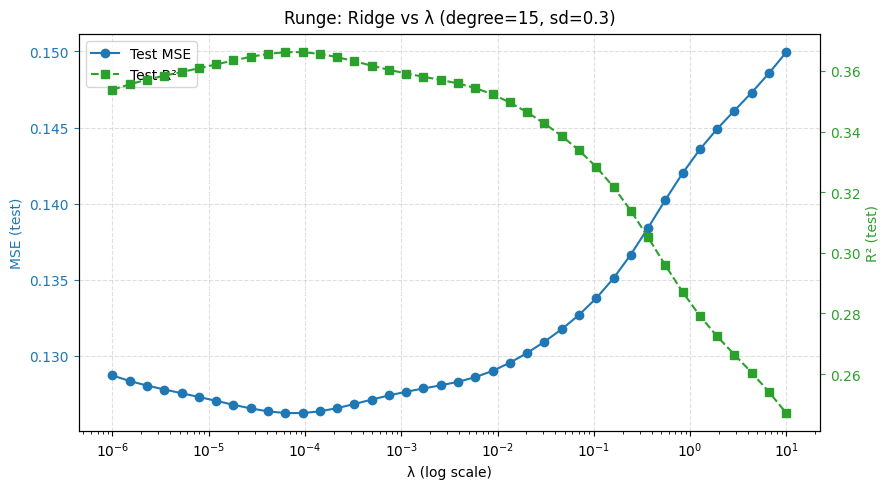

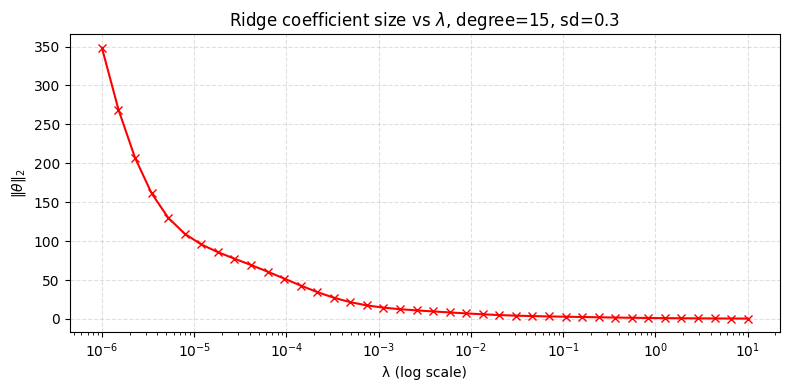

In [2]:
# --- Part (b): Ridge regularization ---

from Code.models import sweep_ridge
from Code.plots import plot_ridge_curves, plot_theta_norms

# Ridge vs lambda (fixed degree)

mse_r, r2_r, norms_r = sweep_ridge(
    X_full, y, split_func=split_and_scale,
    degree=P_FIXED, lambdas=LAM_GRID_RIDGE
)

# plots for (b)
# plot MSE and R2 vs lambda:
plot_ridge_curves(LAM_GRID_RIDGE, mse_r, r2_r, title=f"Runge: Ridge vs λ (degree={P_FIXED}, sd=0.3)", savepath=fig_dir / "runge_ridge_mse_r2_vs_lambda.png")

# plot Ridge coefficient norms vs lambda:
plot_theta_norms(LAM_GRID_RIDGE, norms_r,
                 xlabel="λ (log scale)",
                 title=r"Ridge coefficient size vs $\lambda$, degree=15, sd=0.3",
                 savepath=fig_dir / "ridge_theta_norms_vs_lambda.png",
                 logx=True)